# Conclusion

Dataset contains stats accumulated for team vs. a unique team.

Decision tree classification with pruned parameter values found with `RandomizedSearchCV`.

Only freethrow prediction accuracy beat the target data, and by only ~1%.

## HOME_TEAM_WINS

Target to beat - 59.1% home winrate

Achieved - **59% accuracy**

|Pruning|Accuracy|0 Precision|0 Recall|0 f1-score|1 Precision|1 Recall|1 f1-score|
|-|-|-|-|-|-|-|-|
|None|0.52|0.42|0.41|0.42|0.59|0.60|0.59|
|max_depth=11|0.58|0.38|0.04|0.07|0.58|0.96|0.73|
|max_leaf_nodes=17|0.59|0.58|0.01|0.02|0.59|1.00|0.74|
|max_features=8|0.51|0.40|0.37|0.38|0.58|0.61|0.59|

## HOME_HIGHER_FG_PCT

Target to beat - 55.0% rate of home having higher FGP

Achieved - **55% accuracy**

|Pruning|Accuracy|0 Precision|0 Recall|0 f1-score|1 Precision|1 Recall|1 f1-score|
|-|-|-|-|-|-|-|-|
|None|0.49|0.44|0.43|0.43|0.54|0.54|0.54|
|max_depth=5|0.54|0.47|0.09|0.15|0.55|0.92|0.69|
|max_leaf_nodes=15|0.55|0.44|0.02|0.04|0.55|0.98|0.70|
|max_features=3|0.52|0.46|0.46|0.46|0.56|0.56|0.56|

## HOME_HIGHER_FG3_PCT

Target to beat - 50.8% rate of home having higher FG3

Achieved - **51% accuracy**

|Pruning|Accuracy|0 Precision|0 Recall|0 f1-score|1 Precision|1 Recall|1 f1-score|
|-|-|-|-|-|-|-|-|
|None|0.51|0.50|0.49|0.50|0.51|0.52|0.51|
|max_depth=30|0.50|0.50|0.48|0.49|0.51|0.53|0.52|
|max_leaf_nodes=16|0.51|0.53|0.04|0.08|0.51|0.96|0.66|
|max_features=log2|0.51|0.50|0.50|0.50|0.51|0.51|0.51|

## HOME_HIGHER_FT_PCT

Target to beat - 49.5% rate of home having higher FTP

Achieved - **51% accuracy**

|Pruning|Accuracy|0 Precision|0 Recall|0 f1-score|1 Precision|1 Recall|1 f1-score|
|-|-|-|-|-|-|-|-|
|None|0.48|0.49|0.50|0.49|0.48|0.47|0.47|
|max_depth=57|0.48|0.49|0.50|0.49|0.48|0.47|0.47|
|max_leaf_nodes=87|0.50|0.51|0.34|0.41|0.49|0.66|0.56|
|max_features=9|0.51|0.52|0.51|0.52|0.51|0.52|0.51|

## HOME_HIGHER_AST

Target to beat - 55.0% rate of home having higher AST

Achieved - **54% accuracy**

|Pruning|Accuracy|0 Precision|0 Recall|0 f1-score|1 Precision|1 Recall|1 f1-score|
|-|-|-|-|-|-|-|-|
|None|0.51|0.46|0.47|0.46|0.55|0.55|0.55|
|max_depth=5|0.54|0.48|0.29|0.36|0.56|0.74|0.63|
|max_leaf_nodes=10|0.54|0.31|0.00|0.01|0.54|0.99|0.70|
|max_features=8|0.50|0.45|0.45|0.45|0.54|0.54|0.54|

## HOME_HIGHER_REB

Target to beat - 53.4% rate of home having higher REB

Achieved - **52% accuracy**

|Pruning|Accuracy|0 Precision|0 Recall|0 f1-score|1 Precision|1 Recall|1 f1-score|
|-|-|-|-|-|-|-|-|
|None|0.50|0.48|0.46|0.47|0.52|0.53|0.52|
|max_depth=6|0.52|0.50|0.02|0.04|0.52|0.98|0.68|
|max_leaf_nodes=28|0.52|0.51|0.03|0.06|0.52|0.97|0.68|
|max_features=5|0.51|0.48|0.46|0.47|0.53|0.55|0.54|


In [62]:
## Make width of notebook 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [63]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false; // disable scrollable frames
}

<IPython.core.display.Javascript object>

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
from datasets import data as Local ## Local module to get dataframes

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [65]:
games_df, winners_df, greater_fgp_df, greater_fg3_df, greater_ft_df, greater_ast_df, greater_reb_df, cumulative_stats_df, games_details_df, teams_df, players_df, ranking_df = \
    Local.get_all_dataset_dataframes('../../datasets/')

In [66]:
team_v_team_stats_df = Local.get_team_v_team_stats_dataframe('../../datasets/')

# Target datasets

- Home has:
    - 59.1% Winrate
    - 55.0% Rate of Higher FGP
    - 50.8% Rate of Higher FG3
    - 49.5% Rate of Higher FTP
    - 55.0% Rate of Higher AST
    - 53.4% Rate of Higher REB

In [67]:
winners_df # Whether the home team won in a game in each row of `games_df`

16157    1
16156    1
16155    1
16154    1
16153    1
        ..
4        0
3        0
2        0
1        1
0        1
Name: HOME_TEAM_WINS, Length: 23520, dtype: int64

In [68]:
winners_df.describe()

count    23520.000000
mean         0.591029
std          0.491654
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_TEAM_WINS, dtype: float64

In [69]:
greater_fgp_df.describe()

count    23520.000000
mean         0.550468
std          0.497457
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG_PCT, dtype: float64

In [70]:
greater_fg3_df.describe()

count    23520.000000
mean         0.507993
std          0.499947
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG3_PCT, dtype: float64

In [71]:
greater_ft_df.describe()

count    23520.000000
mean         0.494855
std          0.499984
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FT_PCT, dtype: float64

In [72]:
greater_ast_df.describe()

count    23520.000000
mean         0.550128
std          0.497491
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_AST, dtype: float64

In [73]:
greater_reb_df.describe()

count    23520.000000
mean         0.533886
std          0.498861
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_REB, dtype: float64

# Datasets

In [74]:
games_df

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
16157,2003-10-05,10300001,1610612762,1610612742,2003,90.0,0.457,0.735,0.143,23.0,41.0,85.0,0.447,0.500,0.250,20.0,38.0
16156,2003-10-06,10300002,1610612763,1610612749,2003,105.0,0.494,0.618,0.267,25.0,48.0,94.0,0.427,0.700,0.154,20.0,43.0
16155,2003-10-07,10300009,1610612758,1610612746,2003,101.0,0.467,0.871,0.444,19.0,39.0,82.0,0.368,0.609,0.364,13.0,50.0
16154,2003-10-07,10300005,1610612757,1610612745,2003,104.0,0.527,0.657,0.429,22.0,33.0,80.0,0.470,0.667,0.333,10.0,37.0
16153,2003-10-07,10300007,1610612748,1610612755,2003,86.0,0.352,0.647,0.222,15.0,55.0,79.0,0.329,0.897,0.143,7.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-12-18,12000040,1610612761,1610612748,2020,105.0,0.380,0.737,0.356,27.0,37.0,117.0,0.534,0.741,0.514,30.0,51.0
3,2020-12-18,12000039,1610612754,1610612755,2020,107.0,0.371,0.692,0.262,19.0,45.0,113.0,0.533,0.629,0.355,23.0,48.0
2,2020-12-19,12000049,1610612763,1610612737,2020,116.0,0.400,0.744,0.396,21.0,43.0,117.0,0.422,0.837,0.297,24.0,47.0
1,2020-12-19,12000048,1610612764,1610612765,2020,99.0,0.427,0.625,0.295,24.0,45.0,96.0,0.402,0.647,0.326,18.0,51.0


In [75]:
team_v_team_stats_df

,DATE,GAME_ID,SEASON_TYPE,SEASON,GAMES_PLAYED_home,GAMES_PLAYED_away,FG3_PCT_total_home,PPG_total_home,FG_PCT_total_home,RPG_total_home,...,FG3_PCT_total_away,PPG_total_away,FG_PCT_total_away,RPG_total_away,FT_PCT_total_away,APG_total_away,TEAM_ID_away,TEAM_ID_home,W_PCT_away,W_PCT_home
0,2003-10-05,10300001,1,2003,0,0,0.000,0.0,0.000,0.0,...,0.000,0.0,0.000,0.0,0.000,0.0,1.610613e+09,1.610613e+09,0.0,0.0
1,2003-10-06,10300002,1,2003,0,0,0.000,0.0,0.000,0.0,...,0.000,0.0,0.000,0.0,0.000,0.0,1.610613e+09,1.610613e+09,0.0,0.0
2,2003-10-07,10300009,1,2003,0,0,0.000,0.0,0.000,0.0,...,0.000,0.0,0.000,0.0,0.000,0.0,1.610613e+09,1.610613e+09,0.0,0.0
3,2003-10-07,10300005,1,2003,0,0,0.000,0.0,0.000,0.0,...,0.000,0.0,0.000,0.0,0.000,0.0,1.610613e+09,1.610613e+09,0.0,0.0
4,2003-10-07,10300007,1,2003,0,0,0.000,0.0,0.000,0.0,...,0.000,0.0,0.000,0.0,0.000,0.0,1.610613e+09,1.610613e+09,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23511,2020-12-18,12000044,1,2020,1,1,0.324,103.0,0.381,46.0,...,0.333,124.0,0.542,61.0,0.643,26.0,1.610613e+09,1.610613e+09,1.0,0.0
23516,2020-12-18,12000039,1,2020,0,0,0.000,0.0,0.000,0.0,...,0.000,0.0,0.000,0.0,0.000,0.0,1.610613e+09,1.610613e+09,0.0,0.0
23518,2020-12-19,12000048,1,2020,1,1,0.265,86.0,0.397,42.0,...,0.400,97.0,0.494,42.0,0.583,20.0,1.610613e+09,1.610613e+09,1.0,0.0
23517,2020-12-19,12000049,1,2020,1,1,0.380,128.0,0.474,58.0,...,0.289,106.0,0.381,46.0,0.864,25.0,1.610613e+09,1.610613e+09,0.0,1.0


## Attach target columns to dataset

In [76]:
team_v_team_stats_copy_df = team_v_team_stats_df.copy()
team_v_team_stats_copy_df['home_win'] = winners_df
team_v_team_stats_copy_df['greater_fgp'] = greater_fgp_df
team_v_team_stats_copy_df['greater_fg3'] = greater_fg3_df
team_v_team_stats_copy_df['greater_ft'] = greater_ft_df
team_v_team_stats_copy_df['greater_ast'] = greater_ast_df
team_v_team_stats_copy_df['greater_reb'] = greater_reb_df

## Remove rows w/o data

In [77]:
team_v_team_stats_copy_df = team_v_team_stats_copy_df[(team_v_team_stats_copy_df['GAMES_PLAYED_home']>0) & (team_v_team_stats_copy_df['GAMES_PLAYED_away']>0)]

# Get new target datasets after row removal
winners_df = team_v_team_stats_copy_df['home_win']
greater_fgp_df = team_v_team_stats_copy_df['greater_fgp']
greater_fg3_df = team_v_team_stats_copy_df['greater_fg3']
greater_ft_df = team_v_team_stats_copy_df['greater_ft']
greater_ast_df = team_v_team_stats_copy_df['greater_ast']
greater_reb_df = team_v_team_stats_copy_df['greater_reb']

## Remove non-data

In [78]:
# Delete non-data
for key in [
    'DATE','GAME_ID','TEAM_ID_home','TEAM_ID_away','SEASON_TYPE','SEASON','GAMES_PLAYED_home','GAMES_PLAYED_away',
    'home_win','greater_fgp','greater_fg3','greater_ft','greater_ast','greater_reb'
]:
    del team_v_team_stats_copy_df[key]
team_v_team_stats_copy_df

,FG3_PCT_total_home,PPG_total_home,FG_PCT_total_home,RPG_total_home,FT_PCT_total_home,APG_total_home,FG3_PCT_total_away,PPG_total_away,FG_PCT_total_away,RPG_total_away,FT_PCT_total_away,APG_total_away,W_PCT_away,W_PCT_home
26,0.211,78.0,0.329,38.0,0.737,8.0,0.370,98.0,0.413,42.0,0.703,22.0,1.0,0.0
49,0.000,98.0,0.500,37.0,0.800,17.0,0.700,105.0,0.527,39.0,0.714,27.0,1.0,0.0
44,0.667,58.0,0.457,31.0,0.700,10.0,0.300,62.0,0.385,30.0,0.576,11.0,1.0,0.0
53,0.286,104.0,0.493,40.0,0.700,22.0,0.214,89.0,0.462,36.0,0.538,21.0,0.0,1.0
87,0.250,85.0,0.447,38.0,0.500,20.0,0.143,90.0,0.457,41.0,0.735,23.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23509,0.310,107.0,0.407,45.0,0.800,26.0,0.400,112.0,0.476,47.0,0.750,20.0,1.0,0.0
23511,0.324,103.0,0.381,46.0,0.680,22.0,0.333,124.0,0.542,61.0,0.643,26.0,1.0,0.0
23518,0.265,86.0,0.397,42.0,0.682,18.0,0.400,97.0,0.494,42.0,0.583,20.0,1.0,0.0
23517,0.380,128.0,0.474,58.0,0.773,33.0,0.289,106.0,0.381,46.0,0.864,25.0,0.0,1.0


## Train test split

In [79]:
X_train_dict = {}
X_test_dict = {}
y_train_dict = {}
y_test_dict = {}

for target, key in [(winners_df, 'winner'), (greater_fgp_df, 'fgp'), (greater_fg3_df, 'fg3'), (greater_ft_df, 'ft'), (greater_ast_df, 'ast'), (greater_reb_df, 'reb')]:
    X_train_dict[key], X_test_dict[key], y_train_dict[key], y_test_dict[key] = train_test_split(
        team_v_team_stats_copy_df,
        target,
        train_size=0.8,
        random_state=0,
    )

## Do hyperparameters searches

In [80]:
from sklearn.tree import plot_tree
from yellowbrick.model_selection import FeatureImportances

In [81]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [82]:
# Get best params based from CV function
def do_cv(classifier, cv_fun, params, x, y, **kwargs):
    clf = cv_fun(
        classifier,
        params,
        scoring='accuracy', # Optimize for the 'accuracy' score of the model.
        **kwargs,
    )
    clf.fit(x, y)
    return clf

## Plot feature importances

In [83]:
def plot_feature_importances(clf, X, y):
    viz = FeatureImportances(clf, labels=X.columns)
    viz.fit(X, y)
    viz.show()

## Train decision tree w/o pruning

In [84]:
from sklearn.metrics import classification_report

In [85]:
def print_all_metrics_and_plot(clf, X_train_dict, X_test_dict, grid_cv_params):
    for key in X_train_dict.keys():
        cv_clf = do_cv(
            clf,
            RandomizedSearchCV,
            grid_cv_params,
            X_train_dict[key],
            y_train_dict[key],
        )
        print(key.upper()+':\n')
        print('Best decision tree accuracy (%s): %.2f' % (str(cv_clf.best_params_), cv_clf.score(X_test_dict[key], y_test_dict[key])))
        print(classification_report(y_test_dict[key], cv_clf.best_estimator_.predict(X_test_dict[key])))
        plot_feature_importances(cv_clf.best_estimator_, X_train_dict[key], y_train_dict[key])
        print('---------------------------------------------')

c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({}): 0.52
              precision    recall  f1-score   support

           0       0.42      0.41      0.42      1330
           1       0.59      0.60      0.59      1877

    accuracy                           0.52      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.52      0.52      0.52      3207



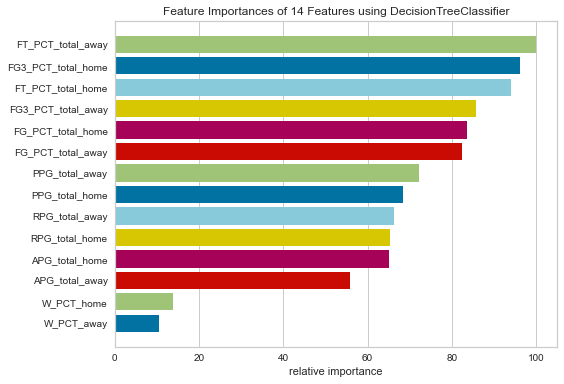

---------------------------------------------


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({}): 0.49
              precision    recall  f1-score   support

           0       0.44      0.43      0.43      1447
           1       0.54      0.54      0.54      1760

    accuracy                           0.49      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.49      0.49      0.49      3207



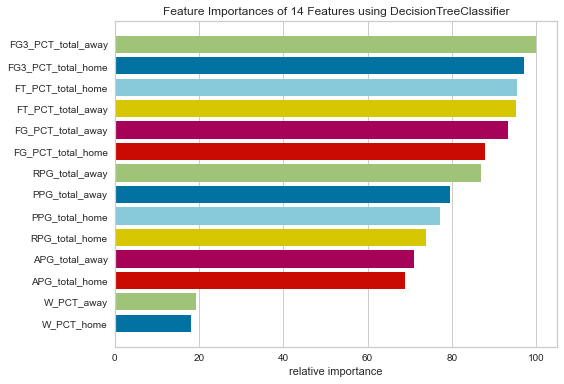

---------------------------------------------


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({}): 0.51
              precision    recall  f1-score   support

           0       0.50      0.49      0.50      1587
           1       0.51      0.52      0.51      1620

    accuracy                           0.51      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.51      0.51      0.51      3207



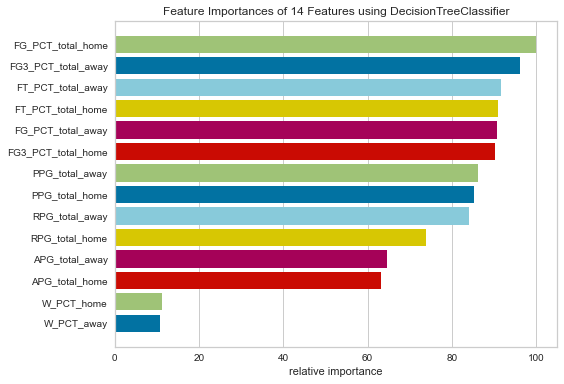

---------------------------------------------


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({}): 0.48
              precision    recall  f1-score   support

           0       0.49      0.50      0.49      1629
           1       0.48      0.47      0.47      1578

    accuracy                           0.48      3207
   macro avg       0.48      0.48      0.48      3207
weighted avg       0.48      0.48      0.48      3207



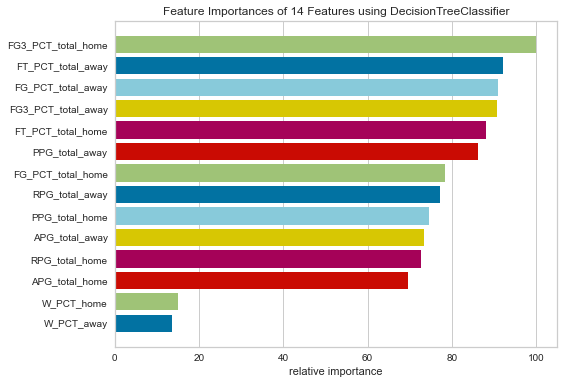

---------------------------------------------


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({}): 0.51
              precision    recall  f1-score   support

           0       0.46      0.47      0.46      1460
           1       0.55      0.55      0.55      1747

    accuracy                           0.51      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.51      0.51      0.51      3207



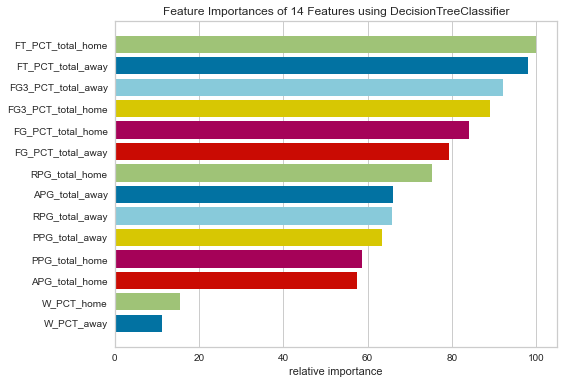

---------------------------------------------


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({}): 0.50
              precision    recall  f1-score   support

           0       0.48      0.46      0.47      1535
           1       0.52      0.53      0.52      1672

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



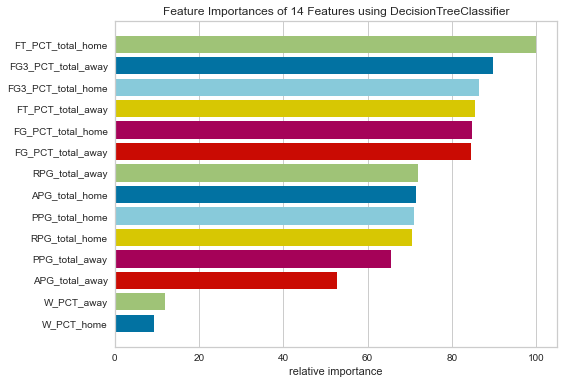

---------------------------------------------


In [86]:
print_all_metrics_and_plot(
    DecisionTreeClassifier(random_state=0),
    X_train_dict,
    X_test_dict,
    {},
)

In [87]:
# plt.figure(figsize=(15,10))
# t = plot_tree(decision_tree_clf)

## Try prune max depth

WINNER:

Best decision tree accuracy ({'max_depth': 11, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.38      0.04      0.07      1330
           1       0.58      0.96      0.73      1877

    accuracy                           0.58      3207
   macro avg       0.48      0.50      0.40      3207
weighted avg       0.50      0.58      0.45      3207



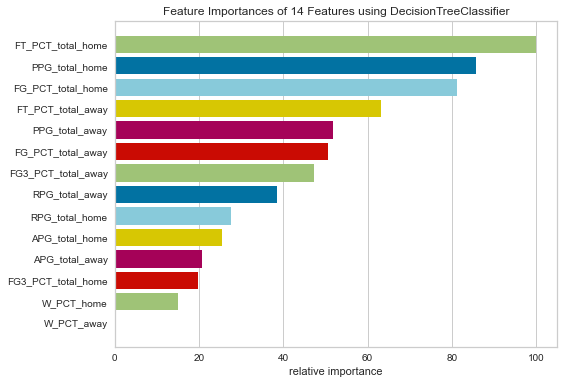

---------------------------------------------
FGP:

Best decision tree accuracy ({'max_depth': 5, 'criterion': 'gini'}): 0.54
              precision    recall  f1-score   support

           0       0.47      0.09      0.15      1447
           1       0.55      0.92      0.69      1760

    accuracy                           0.54      3207
   macro avg       0.51      0.50      0.42      3207
weighted avg       0.52      0.54      0.44      3207



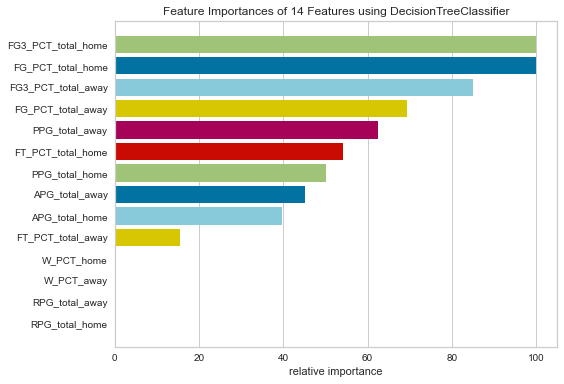

---------------------------------------------
FG3:

Best decision tree accuracy ({'max_depth': 30, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.48      0.49      1587
           1       0.51      0.53      0.52      1620

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



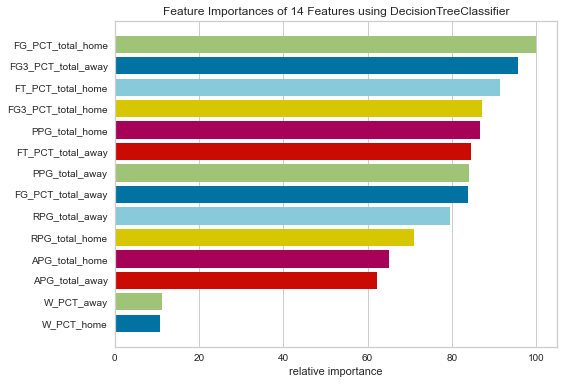

---------------------------------------------
FT:

Best decision tree accuracy ({'max_depth': 57, 'criterion': 'gini'}): 0.48
              precision    recall  f1-score   support

           0       0.49      0.50      0.49      1629
           1       0.48      0.47      0.47      1578

    accuracy                           0.48      3207
   macro avg       0.48      0.48      0.48      3207
weighted avg       0.48      0.48      0.48      3207



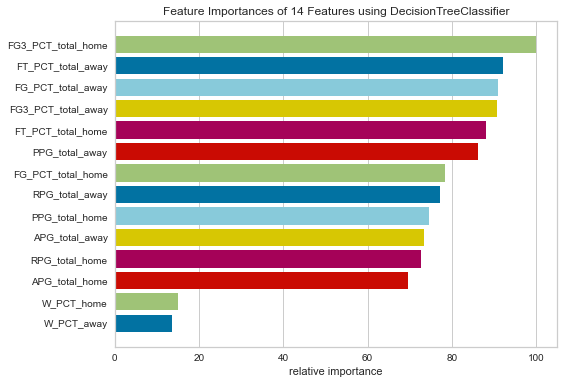

---------------------------------------------
AST:

Best decision tree accuracy ({'max_depth': 5, 'criterion': 'gini'}): 0.54
              precision    recall  f1-score   support

           0       0.48      0.29      0.36      1460
           1       0.56      0.74      0.63      1747

    accuracy                           0.54      3207
   macro avg       0.52      0.52      0.50      3207
weighted avg       0.52      0.54      0.51      3207



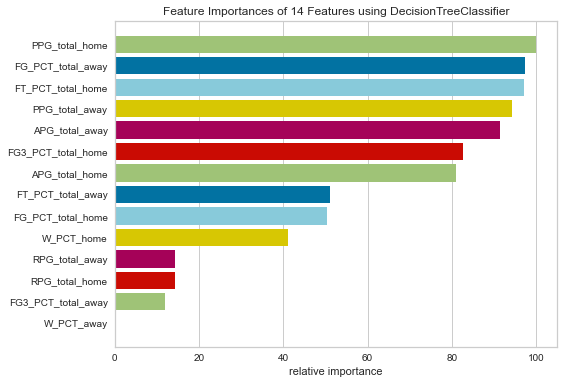

---------------------------------------------
REB:

Best decision tree accuracy ({'max_depth': 6, 'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.50      0.02      0.04      1535
           1       0.52      0.98      0.68      1672

    accuracy                           0.52      3207
   macro avg       0.51      0.50      0.36      3207
weighted avg       0.51      0.52      0.37      3207



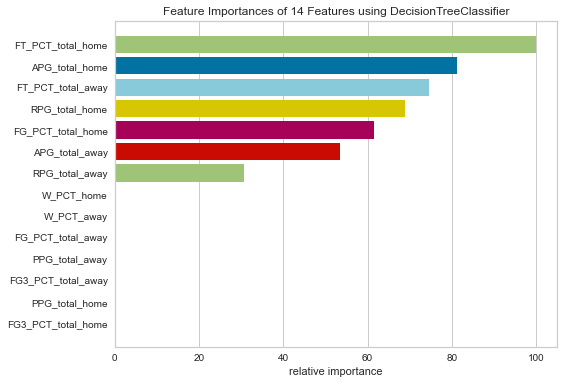

---------------------------------------------


In [88]:
print_all_metrics_and_plot(
    DecisionTreeClassifier(random_state=0),
    X_train_dict,
    X_test_dict,
    {
        'max_depth': [*range(4,60)],
        'criterion': ['gini', 'entropy'],
    },
)

## Try prune impurity decrease

In [96]:
# print_all_metrics_and_plot(
#     DecisionTreeClassifier(random_state=0),
#     X_train_dict,
#     X_test_dict,
#     {
#         'min_impurity_decrease': [0.0,0.01],
#         'criterion': ['gini', 'entropy'],
#     },
# )

## Try prune max leaves

WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 17, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.58      0.01      0.02      1330
           1       0.59      1.00      0.74      1877

    accuracy                           0.59      3207
   macro avg       0.58      0.50      0.38      3207
weighted avg       0.58      0.59      0.44      3207



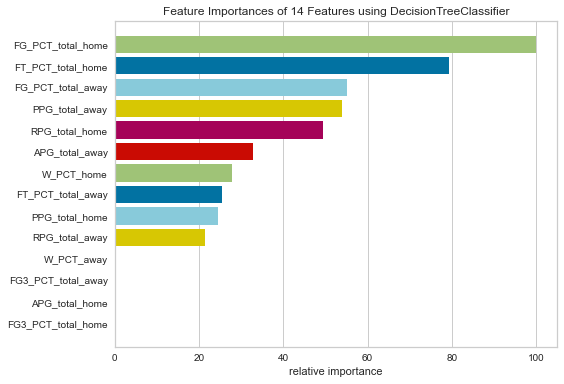

---------------------------------------------
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 15, 'criterion': 'gini'}): 0.55
              precision    recall  f1-score   support

           0       0.44      0.02      0.04      1447
           1       0.55      0.98      0.70      1760

    accuracy                           0.55      3207
   macro avg       0.50      0.50      0.37      3207
weighted avg       0.50      0.55      0.40      3207



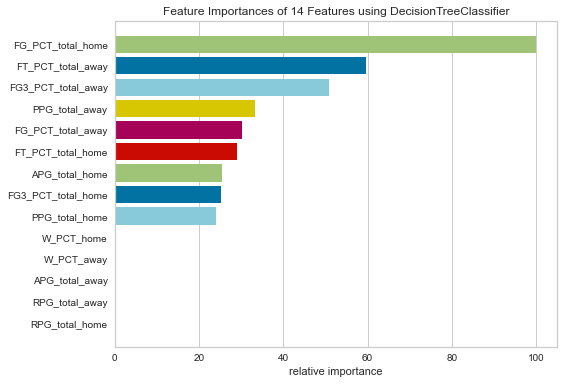

---------------------------------------------
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 16, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.53      0.04      0.08      1587
           1       0.51      0.96      0.66      1620

    accuracy                           0.51      3207
   macro avg       0.52      0.50      0.37      3207
weighted avg       0.52      0.51      0.38      3207



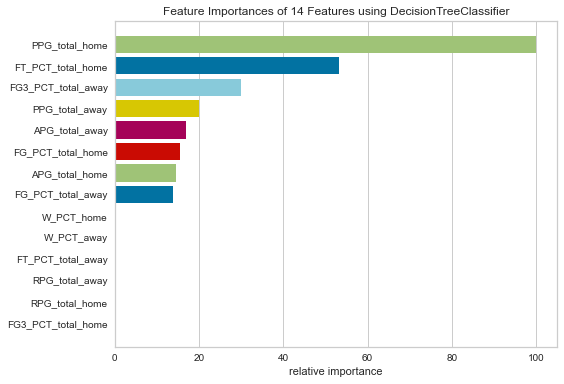

---------------------------------------------
FT:

Best decision tree accuracy ({'max_leaf_nodes': 87, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.34      0.41      1629
           1       0.49      0.66      0.56      1578

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.48      3207
weighted avg       0.50      0.50      0.48      3207



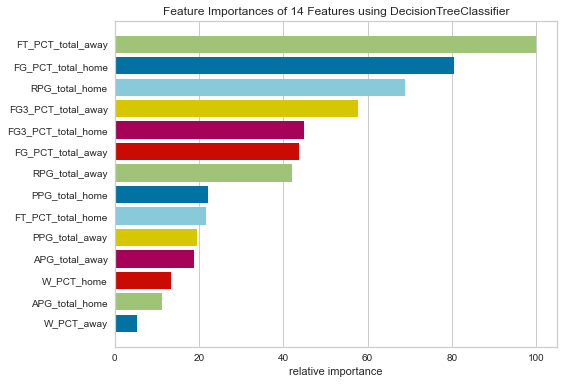

---------------------------------------------
AST:

Best decision tree accuracy ({'max_leaf_nodes': 10, 'criterion': 'entropy'}): 0.54
              precision    recall  f1-score   support

           0       0.31      0.00      0.01      1460
           1       0.54      0.99      0.70      1747

    accuracy                           0.54      3207
   macro avg       0.43      0.50      0.35      3207
weighted avg       0.44      0.54      0.39      3207



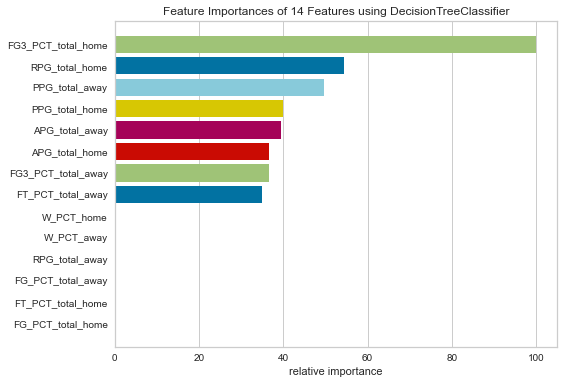

---------------------------------------------
REB:

Best decision tree accuracy ({'max_leaf_nodes': 28, 'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.51      0.03      0.06      1535
           1       0.52      0.97      0.68      1672

    accuracy                           0.52      3207
   macro avg       0.52      0.50      0.37      3207
weighted avg       0.52      0.52      0.38      3207



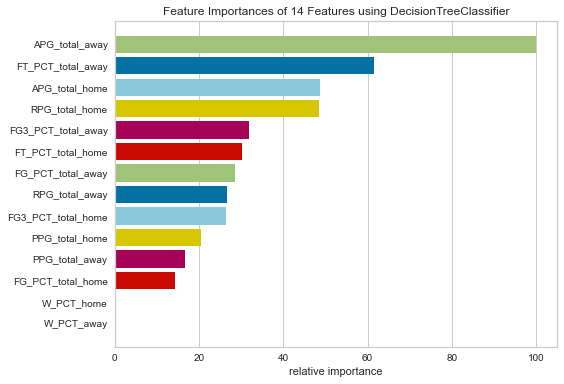

---------------------------------------------


In [95]:
print_all_metrics_and_plot(
    DecisionTreeClassifier(random_state=0),
    X_train_dict,
    X_test_dict,
    {
        'max_leaf_nodes': [*range(4,120)],
        'criterion': ['gini', 'entropy'],
    },
)

## Try prune max features

WINNER:

Best decision tree accuracy ({'max_features': 8, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.40      0.37      0.38      1330
           1       0.58      0.61      0.59      1877

    accuracy                           0.51      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.50      0.51      0.50      3207



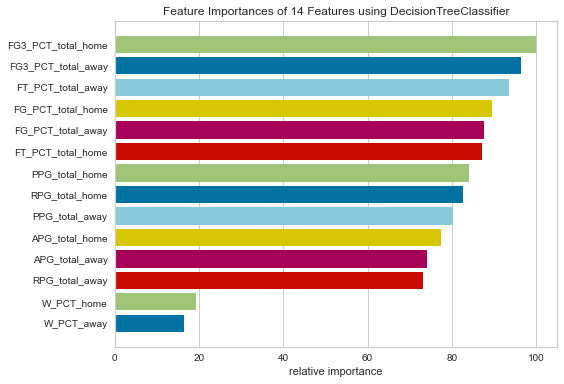

---------------------------------------------
FGP:

Best decision tree accuracy ({'max_features': 3, 'criterion': 'gini'}): 0.52
              precision    recall  f1-score   support

           0       0.46      0.46      0.46      1447
           1       0.56      0.56      0.56      1760

    accuracy                           0.52      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.52      0.52      0.52      3207



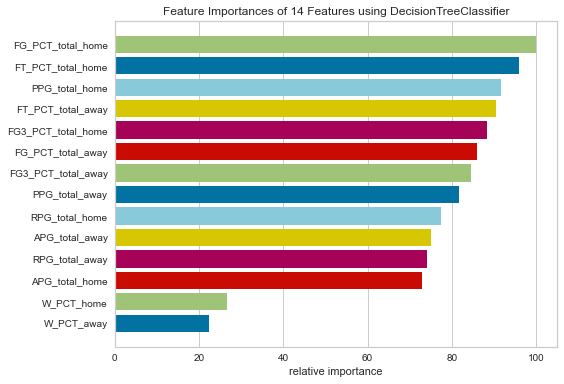

---------------------------------------------
FG3:

Best decision tree accuracy ({'max_features': 'log2', 'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1587
           1       0.51      0.51      0.51      1620

    accuracy                           0.51      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.51      0.51      0.51      3207



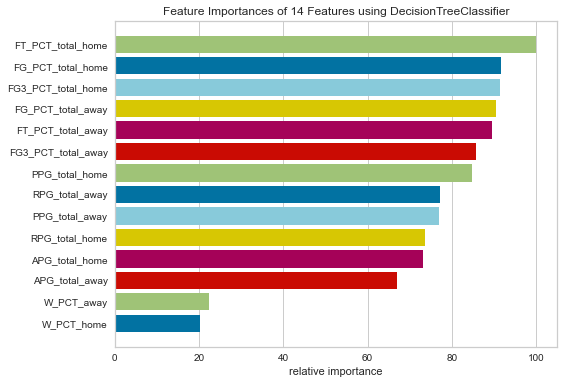

---------------------------------------------
FT:

Best decision tree accuracy ({'max_features': 9, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.52      0.51      0.52      1629
           1       0.51      0.52      0.51      1578

    accuracy                           0.51      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.51      0.51      0.51      3207



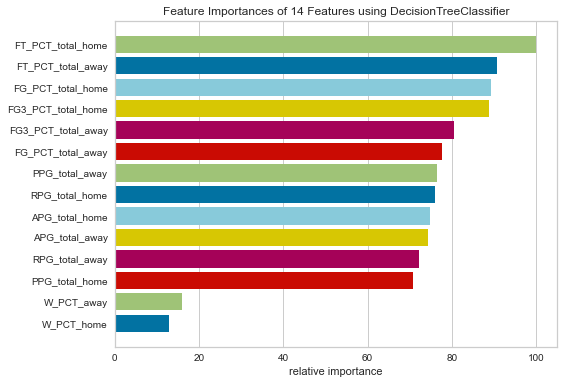

---------------------------------------------
AST:

Best decision tree accuracy ({'max_features': 8, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.45      0.45      0.45      1460
           1       0.54      0.54      0.54      1747

    accuracy                           0.50      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.50      0.50      0.50      3207



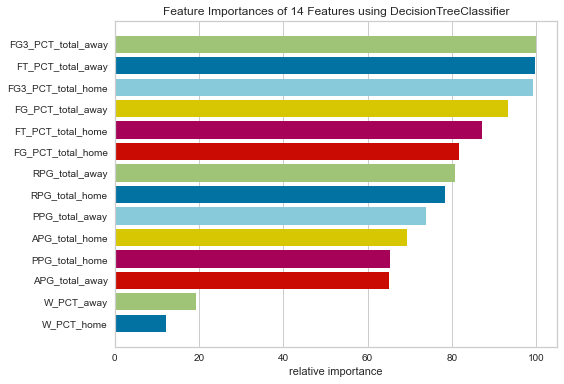

---------------------------------------------
REB:

Best decision tree accuracy ({'max_features': 5, 'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.48      0.46      0.47      1535
           1       0.53      0.55      0.54      1672

    accuracy                           0.51      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.51      0.51      0.51      3207



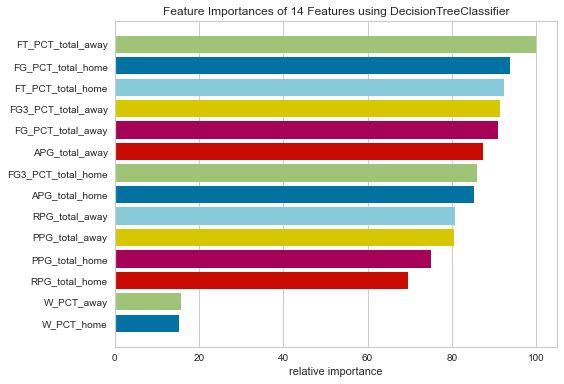

---------------------------------------------


In [91]:
print_all_metrics_and_plot(
    DecisionTreeClassifier(random_state=0),
    X_train_dict,
    X_test_dict,
    {
        'max_features': [*range(1,len(cumulative_stats_df.columns)//2+1), 'sqrt', 'log2', None],
        'criterion': ['gini', 'entropy'],
    },
)

## Try class weight balance

c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.51
              precision    recall  f1-score   support

           0       0.40      0.40      0.40      1330
           1       0.58      0.58      0.58      1877

    accuracy                           0.51      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.51      0.51      0.51      3207



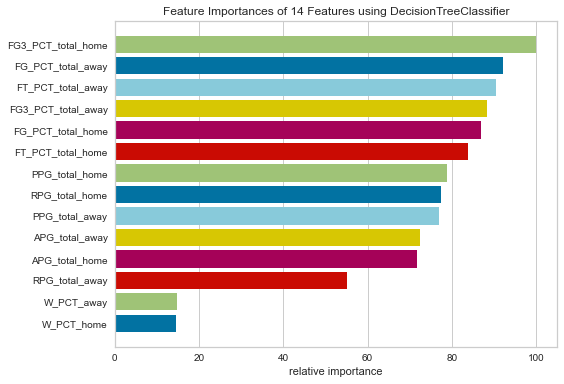

---------------------------------------------


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.50
              precision    recall  f1-score   support

           0       0.44      0.42      0.43      1447
           1       0.54      0.56      0.55      1760

    accuracy                           0.50      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.50      0.50      0.50      3207



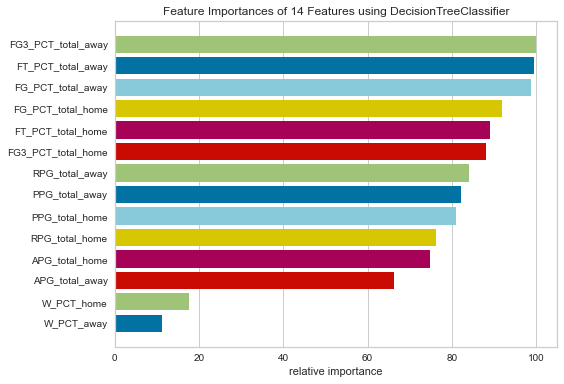

---------------------------------------------


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.51
              precision    recall  f1-score   support

           0       0.50      0.49      0.50      1587
           1       0.51      0.52      0.51      1620

    accuracy                           0.51      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.51      0.51      0.51      3207



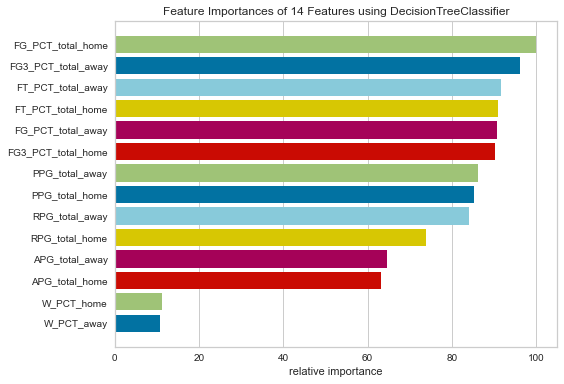

---------------------------------------------


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.48
              precision    recall  f1-score   support

           0       0.49      0.50      0.49      1629
           1       0.48      0.47      0.47      1578

    accuracy                           0.48      3207
   macro avg       0.48      0.48      0.48      3207
weighted avg       0.48      0.48      0.48      3207



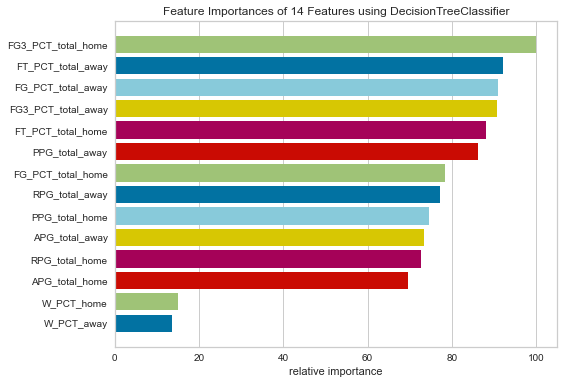

---------------------------------------------


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.51
              precision    recall  f1-score   support

           0       0.46      0.47      0.46      1460
           1       0.55      0.55      0.55      1747

    accuracy                           0.51      3207
   macro avg       0.51      0.51      0.51      3207
weighted avg       0.51      0.51      0.51      3207



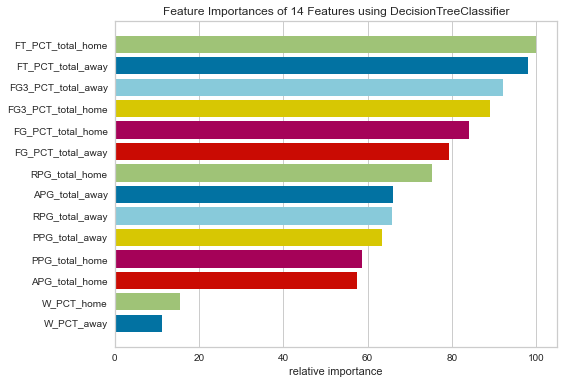

---------------------------------------------


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.50
              precision    recall  f1-score   support

           0       0.48      0.45      0.46      1535
           1       0.52      0.54      0.53      1672

    accuracy                           0.50      3207
   macro avg       0.50      0.50      0.50      3207
weighted avg       0.50      0.50      0.50      3207



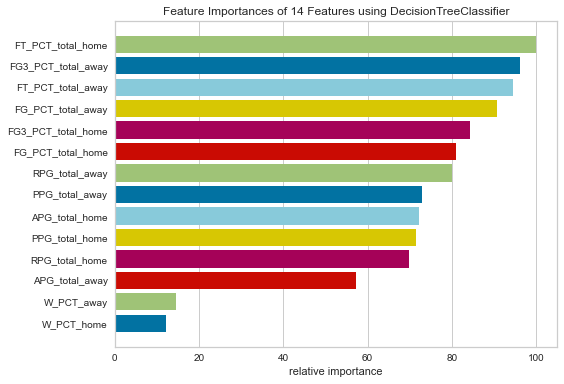

---------------------------------------------


In [92]:
print_all_metrics_and_plot(
    DecisionTreeClassifier(random_state=0),
    X_train_dict,
    X_test_dict,
    {
        'class_weight': ['balanced', None],
        'criterion': ['gini', 'entropy'],
    },
)

## Try w/ diffrent random_state

WINNER:

Best decision tree accuracy ({'max_depth': 4, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.67      0.00      0.01      1330
           1       0.59      1.00      0.74      1877

    accuracy                           0.59      3207
   macro avg       0.63      0.50      0.37      3207
weighted avg       0.62      0.59      0.43      3207



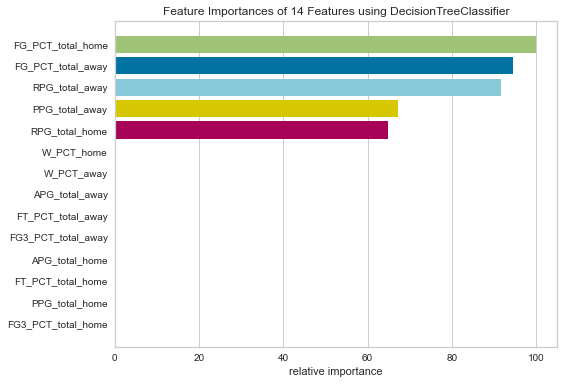

---------------------------------------------
FGP:

Best decision tree accuracy ({'max_depth': 4, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.67      0.01      0.01      1447
           1       0.55      1.00      0.71      1760

    accuracy                           0.55      3207
   macro avg       0.61      0.50      0.36      3207
weighted avg       0.60      0.55      0.40      3207



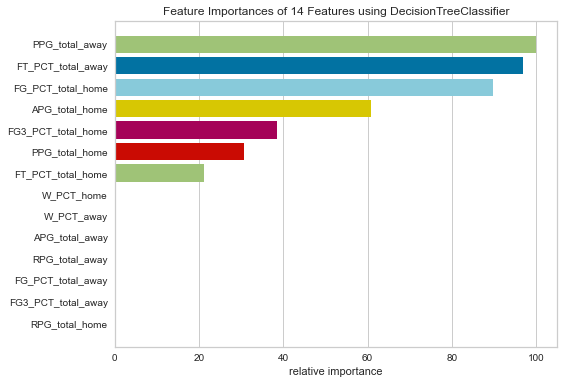

---------------------------------------------
FG3:

Best decision tree accuracy ({'max_depth': 21, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.49      0.57      0.53      1587
           1       0.50      0.42      0.46      1620

    accuracy                           0.49      3207
   macro avg       0.50      0.50      0.49      3207
weighted avg       0.50      0.49      0.49      3207



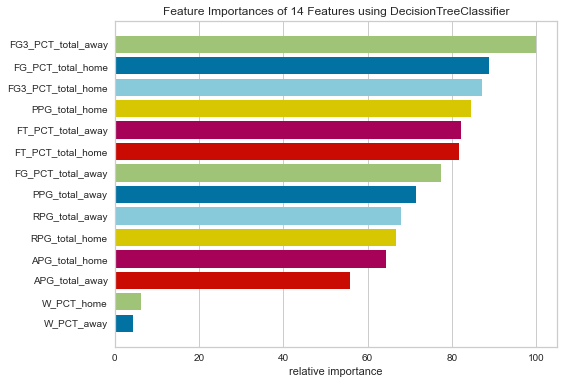

---------------------------------------------
FT:

Best decision tree accuracy ({'max_depth': 35, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1629
           1       0.48      0.48      0.48      1578

    accuracy                           0.49      3207
   macro avg       0.49      0.49      0.49      3207
weighted avg       0.49      0.49      0.49      3207



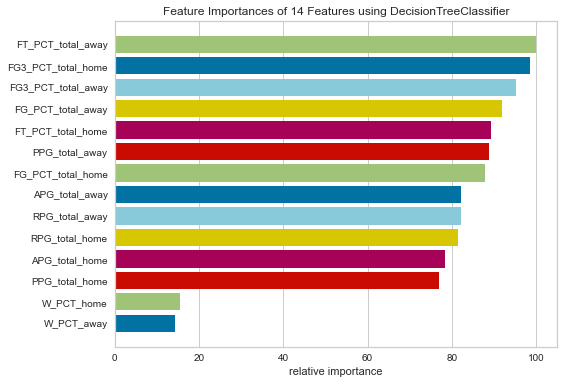

---------------------------------------------
AST:

Best decision tree accuracy ({'max_depth': 5, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.50      0.13      0.21      1460
           1       0.55      0.89      0.68      1747

    accuracy                           0.55      3207
   macro avg       0.53      0.51      0.44      3207
weighted avg       0.53      0.55      0.47      3207



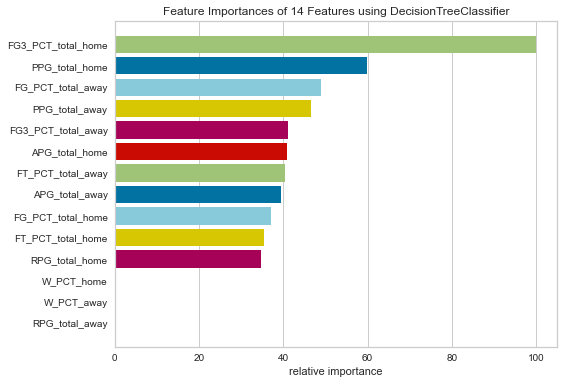

---------------------------------------------
REB:

Best decision tree accuracy ({'max_depth': 7, 'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.52      0.02      0.04      1535
           1       0.52      0.98      0.68      1672

    accuracy                           0.52      3207
   macro avg       0.52      0.50      0.36      3207
weighted avg       0.52      0.52      0.38      3207



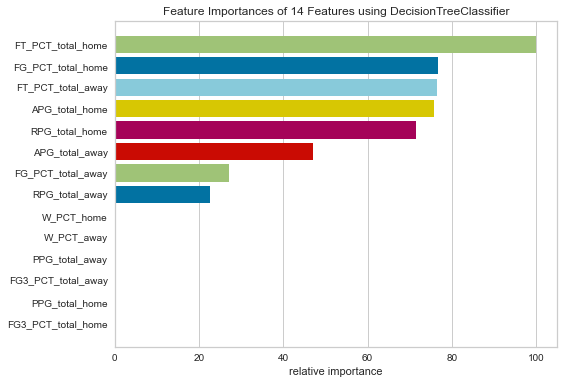

---------------------------------------------


In [93]:
print_all_metrics_and_plot(
    DecisionTreeClassifier(random_state=1234),
    X_train_dict,
    X_test_dict,
    {
        'max_depth': [*range(4,60)],
        'criterion': ['gini', 'entropy'],
    },
)

WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 9, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.67      0.00      0.01      1330
           1       0.59      1.00      0.74      1877

    accuracy                           0.59      3207
   macro avg       0.63      0.50      0.37      3207
weighted avg       0.62      0.59      0.44      3207



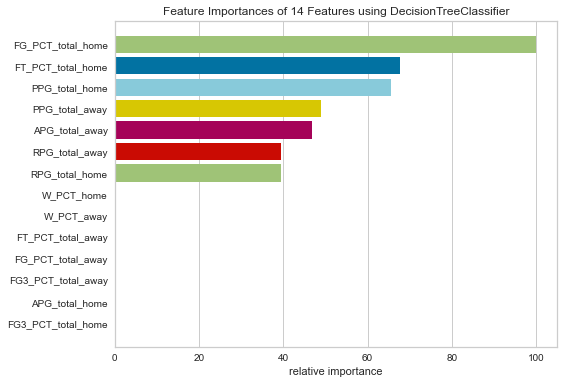

---------------------------------------------
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 11, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.48      0.09      0.15      1447
           1       0.55      0.92      0.69      1760

    accuracy                           0.55      3207
   macro avg       0.52      0.50      0.42      3207
weighted avg       0.52      0.55      0.45      3207



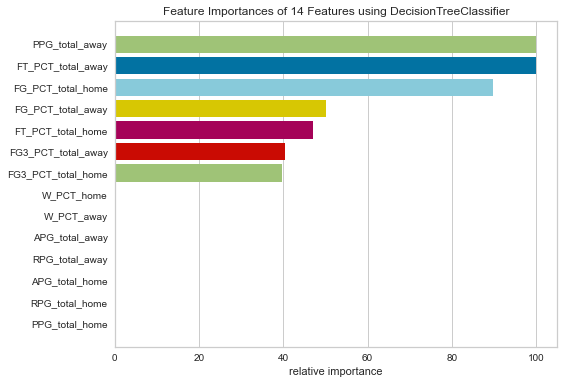

---------------------------------------------
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 20, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.50      0.77      0.61      1587
           1       0.52      0.24      0.33      1620

    accuracy                           0.51      3207
   macro avg       0.51      0.51      0.47      3207
weighted avg       0.51      0.51      0.47      3207



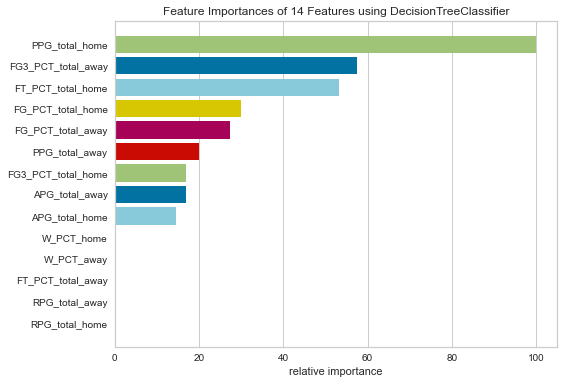

---------------------------------------------
FT:

Best decision tree accuracy ({'max_leaf_nodes': 56, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.50      0.35      0.41      1629
           1       0.49      0.65      0.56      1578

    accuracy                           0.49      3207
   macro avg       0.50      0.50      0.48      3207
weighted avg       0.50      0.49      0.48      3207



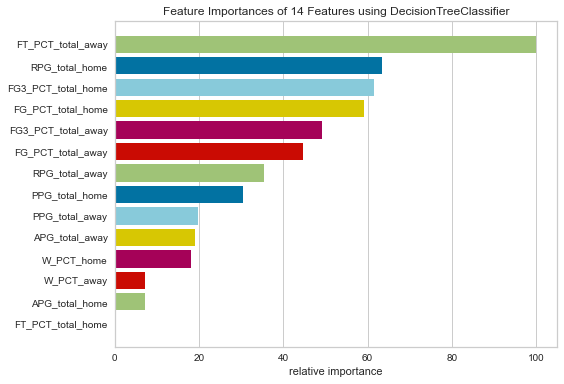

---------------------------------------------
AST:

Best decision tree accuracy ({'max_leaf_nodes': 5, 'criterion': 'gini'}): 0.54
              precision    recall  f1-score   support

           0       0.17      0.00      0.00      1460
           1       0.54      1.00      0.70      1747

    accuracy                           0.54      3207
   macro avg       0.36      0.50      0.35      3207
weighted avg       0.37      0.54      0.38      3207



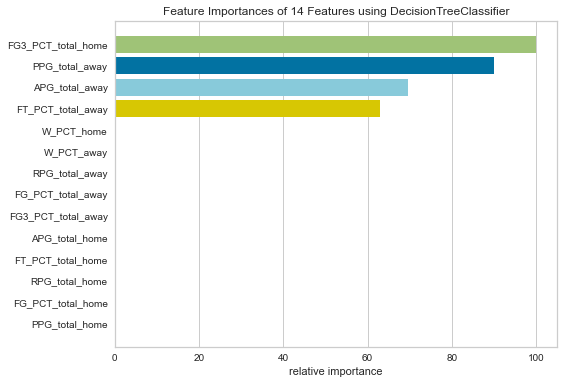

---------------------------------------------
REB:

Best decision tree accuracy ({'max_leaf_nodes': 15, 'criterion': 'gini'}): 0.52
              precision    recall  f1-score   support

           0       0.50      0.03      0.06      1535
           1       0.52      0.97      0.68      1672

    accuracy                           0.52      3207
   macro avg       0.51      0.50      0.37      3207
weighted avg       0.51      0.52      0.38      3207



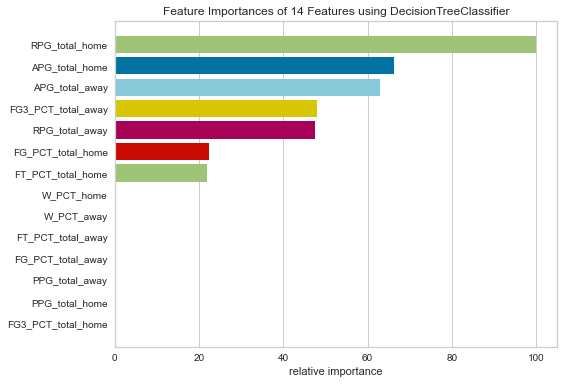

---------------------------------------------


In [94]:
print_all_metrics_and_plot(
    DecisionTreeClassifier(random_state=76634),
    X_train_dict,
    X_test_dict,
    {
        'max_leaf_nodes': [*range(4,60)],
        'criterion': ['gini', 'entropy'],
    },
)